<a href="https://colab.research.google.com/github/navaidansari786/Applliances-Energy-Prediction/blob/main/appliances_energy_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Machine Learning - Regression Problem**

### Data-driven prediction of energy use of appliances
The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions
were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the
temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for
10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters.
Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded
from a public data set from Reliable Prognosis (rp5.ru) and merged together with the
experimental data sets using the date and time column. Two random variables have been
included in the data set for testing the regression models and to filter out non-predictive attributes
(parameters).

date time year-month-day hour:minute:second\
Appliances, energy use in Wh (Dependent variable)\
lights, energy use of light fixtures in the house in Wh (Drop this column)\
T1, Temperature in kitchen area, in Celsius\
RH1, Humidity in kitchen area, in % T2, Temperature in living room area, in Celsius RH2,
Humidity in living room area, in %\
T3, Temperature in laundry room area\
RH3, Humidity in laundry room area, in % T4, Temperature in office room, in Celsius RH4,
Humidity in office room, in %\
T5, Temperature in bathroom, in Celsius\
RH5, Humidity in bathroom, in % T6, Temperature outside the building (north side), in Celsius
RH6, Humidity outside the building (north side), in %\
T7, Temperature in ironing room , in Celsius\
RH7, Humidity in ironing room, in % T8, Temperature in teenager room 2, in Celsius RH8,
Humidity in teenager room 2, in %\
T9, Temperature in parents room, in Celsius\
RH9, Humidity in parents room, in % To, Temperature outside (from Chievres weather station), in
Celsius Pressure (from Chievres weather station), in mm Hg RHout, Humidity outside (from
Chievres weather station), in %\
Wind speed (from Chievres weather station), in m/s\
Visibility (from Chievres weather station), in km\
Tdewpoint (from Chievres weather station), Â°C\
rv1, Random variable 1, nondimensional\
rv2, Random variable 2, nondimensional

Where indicated, hourly data (then interpolated) from the nearest airport weather station
(Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis,
rp5.ru. Permission was obtained from Reliable Prognosis for the distribution of the 4.5 months of
weather data.

In [1]:
# Importing all the related libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set(color_codes=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Mounting the Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Importing the appliances energy prediction data set
aep = pd.read_csv('/content/drive/MyDrive/Alma better/Capstone Project/Supervised ML - Regression/data_application_energy.csv')

In [4]:
aep

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,7.026667,84.256667,17.200000,41.626667,18.2000,48.900000,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,6.833333,84.063333,17.200000,41.560000,18.2000,48.863333,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,6.560000,83.156667,17.200000,41.433333,18.2000,48.730000,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,6.433333,83.423333,17.133333,41.290000,18.1000,48.590000,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,6.366667,84.893333,17.200000,41.230000,18.1000,48.590000,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,52.400000,24.796667,1.000000,24.500000,44.500000,24.7000,50.074000,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,52.326667,24.196667,1.000000,24.557143,44.414286,24.7000,49.790000,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,52.266667,23.626667,1.000000,24.540000,44.400000,24.7000,49.660000,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,52.200000,22.433333,1.000000,24.500000,44.295714,24.6625,49.518750,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [5]:
# No. of rows and columns
aep.shape

(19735, 29)

In [6]:
# Columns name information
aep.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [7]:
aep.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [8]:
aep.tail()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,45.590000,23.20,52.400000,24.796667,1.0,24.500000,44.500000,24.7000,50.07400,23.2,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,45.590000,23.23,52.326667,24.196667,1.0,24.557143,44.414286,24.7000,49.79000,23.2,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,45.730000,23.23,52.266667,23.626667,1.0,24.540000,44.400000,24.7000,49.66000,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,45.790000,23.20,52.200000,22.433333,1.0,24.500000,44.295714,24.6625,49.51875,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
19734,2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,45.963333,23.20,52.200000,21.026667,1.0,24.500000,44.054000,24.7360,49.73600,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


In [9]:
# Column description
aep.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [10]:
#data types present in the columns of data
aep.dtypes

date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object

### As we can see only one column named date is object type and 2 columns named light and appliances are integer type and remaining all the columns are float type

In [11]:
# Total number of duplicate rows persent in this data.
duplicate_rows = aep[aep.duplicated()]
print("Number of duplicate rows:",duplicate_rows.shape)

Number of duplicate rows: (0, 29)


###So there are no duplicate rows in the data set

# **Data preprosessing**

In [12]:
# Null values 
aep.isnull().sum().sort_values(ascending=False)

rv2            0
T6             0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
RH_6           0
rv1            0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
date           0
dtype: int64

### There are no null values in the data

## As we are not trying to analyze the problem as Time Series rather regress on "Appliance" column therefore we are dropping the date column

In [13]:
aep= aep.drop(['date'], axis=1)

# **Data Preprocession`**

In [14]:
# Train = 80%, Test = 20%
train, test = train_test_split(aep,test_size=0.20,random_state=40)

In [15]:
train.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000
mean,97.523436,3.827591,21.678518,40.262143,20.334025,40.426742,22.260086,39.250773,20.850323,39.032470,19.583439,50.920308,7.906445,54.667153,20.258524,35.395282,22.023867,42.945911,19.478627,41.561343,7.407244,755.550528,79.775016,4.051378,38.391414,3.760375,25.024810,25.024810
std,102.668076,7.954862,1.606283,3.981984,2.193174,4.076340,1.999775,3.258047,2.040500,4.351714,1.842384,8.956799,6.072646,31.128068,2.104972,5.126754,1.952412,5.238856,2.009700,4.163317,5.299596,7.394142,14.928167,2.453948,11.807620,4.187537,14.530871,14.530871
min,10.000000,0.000000,16.790000,27.233333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.333333,24.000000,0.000000,1.000000,-6.600000,0.006033,0.006033
25%,50.000000,0.000000,20.730000,37.360000,18.790000,37.900000,20.790000,36.900000,19.500000,35.525625,18.288750,45.400000,3.656667,30.073667,18.700000,31.500000,20.790000,39.090000,18.000000,38.500000,3.700000,750.983333,70.333333,2.000000,29.000000,0.916667,12.552884,12.552884
50%,60.000000,0.000000,21.600000,39.626667,20.000000,40.500000,22.100000,38.560000,20.658333,38.400000,19.390000,49.090000,7.300000,55.300000,20.012698,34.882976,22.100000,42.400000,19.390000,40.900000,6.916667,756.100000,83.833333,3.666667,40.000000,3.450000,24.928013,24.928013
75%,100.000000,0.000000,22.600000,43.090000,21.500000,43.290000,23.290000,41.790000,22.100000,42.163333,20.615000,53.656167,11.260000,83.226806,21.600000,39.000000,23.390000,46.558750,20.600000,44.363333,10.400000,760.966667,91.666667,5.500000,40.000000,6.566667,37.752973,37.752973
max,1080.000000,60.000000,26.260000,63.360000,29.856667,56.026667,29.200000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,25.963333,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.993173,49.993173


In [16]:
test.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,3947.000000,3947.000000,3947.000000,3947.000000,3947.000000,3947.000000,3947.000000,3947.000000,3947.000000,3947.000000,3947.000000,3947.000000,3947.000000,3947.000000,3947.000000,3947.000000,3947.000000,3947.000000,3947.000000,3947.000000,3947.000000,3947.000000,3947.000000,3947.000000,3947.000000,3947.000000,3947.000000,3947.000000
mean,98.381049,3.699012,21.718784,40.250125,20.369996,40.395134,22.297711,39.209410,20.875381,39.004637,19.626775,51.065182,7.928915,54.376806,20.301436,35.359872,22.050066,42.897184,19.514633,41.516631,7.429348,755.410896,79.652027,3.993247,38.088513,3.762034,24.840928,24.840928
std,101.960204,7.860195,1.604995,3.969030,2.192215,4.044012,2.031232,3.240859,2.052530,4.299972,1.853380,9.278646,6.161386,31.239477,2.129884,5.064260,1.971198,5.166447,2.034639,4.104207,5.388713,7.420484,14.793748,2.440037,11.741336,4.223504,14.359756,14.359756
min,10.000000,0.000000,16.790000,27.023333,16.100000,21.040000,17.290000,28.860000,15.100000,28.778000,15.345000,30.030000,-6.010000,1.000000,15.396111,23.290000,16.362222,29.600000,14.890000,29.200000,-4.900000,729.300000,25.333333,0.000000,1.000000,-6.500000,0.005322,0.005322
25%,50.000000,0.000000,20.790000,37.300000,18.890000,37.790000,20.790000,36.900000,19.600000,35.557000,18.260000,45.400000,3.530000,29.936429,18.721500,31.426667,20.790000,39.030000,18.063333,38.530000,3.600000,750.700000,70.333333,2.000000,29.000000,0.850000,12.375697,12.375697
50%,60.000000,0.000000,21.600000,39.693333,20.000000,40.466667,22.100000,38.500000,20.666667,38.400000,19.390000,49.000000,7.300000,54.966667,20.100000,34.790000,22.133333,42.290000,19.390000,40.900000,6.900000,756.100000,83.500000,3.500000,40.000000,3.400000,24.768926,24.768926
75%,100.000000,0.000000,22.700000,43.060000,21.500000,43.126667,23.390000,41.663333,22.100000,42.090000,20.619643,53.700000,11.166667,83.156667,21.633333,39.033000,23.390000,46.516667,20.600000,44.290000,10.433333,760.800000,91.333333,5.333333,40.000000,6.575000,37.083798,37.083798
max,1070.000000,70.000000,26.200000,56.393333,29.790000,54.090000,29.236000,48.923333,26.180000,50.963333,25.466667,95.388333,28.236000,99.900000,26.000000,51.197778,27.200000,58.310556,24.500000,53.163333,25.966667,772.200000,100.000000,13.500000,66.000000,15.316667,49.996530,49.996530


In [17]:
## Divide the columns based on type for clear column management 

col_temp = ["T1","T2","T3","T4","T5","T6","T7","T8","T9"]

col_hum = ["RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9"]

col_weather = ["T_out", "Tdewpoint","RH_out","Press_mm_hg",
                "Windspeed","Visibility"] 
col_light = ["lights"]
col_randoms = ["rv1", "rv2"]

col_target = ["Appliances"]

In [18]:
# Seperate dependent and independent variables 
feature_vars = train[col_temp + col_hum + col_weather + col_light + col_randoms ]
target_vars = train[col_target]

In [19]:
feature_vars.describe()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,RH_1,RH_2,RH_3,RH_4,RH_5,RH_6,RH_7,RH_8,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Visibility,lights,rv1,rv2
count,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000
mean,21.678518,20.334025,22.260086,20.850323,19.583439,7.906445,20.258524,22.023867,19.478627,40.262143,40.426742,39.250773,39.032470,50.920308,54.667153,35.395282,42.945911,41.561343,7.407244,3.760375,79.775016,755.550528,4.051378,38.391414,3.827591,25.024810,25.024810
std,1.606283,2.193174,1.999775,2.040500,1.842384,6.072646,2.104972,1.952412,2.009700,3.981984,4.076340,3.258047,4.351714,8.956799,31.128068,5.126754,5.238856,4.163317,5.299596,4.187537,14.928167,7.394142,2.453948,11.807620,7.954862,14.530871,14.530871
min,16.790000,16.100000,17.200000,15.100000,15.330000,-6.065000,15.390000,16.306667,14.890000,27.233333,20.463333,28.766667,27.660000,29.815000,1.000000,23.200000,29.600000,29.166667,-5.000000,-6.600000,24.000000,729.333333,0.000000,1.000000,0.000000,0.006033,0.006033
25%,20.730000,18.790000,20.790000,19.500000,18.288750,3.656667,18.700000,20.790000,18.000000,37.360000,37.900000,36.900000,35.525625,45.400000,30.073667,31.500000,39.090000,38.500000,3.700000,0.916667,70.333333,750.983333,2.000000,29.000000,0.000000,12.552884,12.552884
50%,21.600000,20.000000,22.100000,20.658333,19.390000,7.300000,20.012698,22.100000,19.390000,39.626667,40.500000,38.560000,38.400000,49.090000,55.300000,34.882976,42.400000,40.900000,6.916667,3.450000,83.833333,756.100000,3.666667,40.000000,0.000000,24.928013,24.928013
75%,22.600000,21.500000,23.290000,22.100000,20.615000,11.260000,21.600000,23.390000,20.600000,43.090000,43.290000,41.790000,42.163333,53.656167,83.226806,39.000000,46.558750,44.363333,10.400000,6.566667,91.666667,760.966667,5.500000,40.000000,0.000000,37.752973,37.752973
max,26.260000,29.856667,29.200000,26.200000,25.795000,28.290000,25.963333,27.230000,24.500000,63.360000,56.026667,50.163333,51.090000,96.321667,99.900000,51.400000,58.780000,53.326667,26.100000,15.500000,100.000000,772.300000,14.000000,66.000000,60.000000,49.993173,49.993173


In [20]:
# Check the distribution of values in lights column
feature_vars.lights.value_counts()

0     12182
10     1772
20     1313
30      446
40       69
50        5
60        1
Name: lights, dtype: int64

In [21]:
target_vars.describe()

,Appliances
count,15788.000000
mean,97.523436
std,102.668076
min,10.000000
25%,50.000000
50%,60.000000
75%,100.000000
max,1080.000000


# **Observations**
Temperature columns - Temperature inside the house varies between 14.89 Deg & 29.85 Deg , temperatire outside (T6) varies between -6.06 Deg to 28.29 Deg . The reason for this variation is sensors are kept outside the house

Humidiy columns - Humidity inside house varies is between 20.60% to 63.36% with exception of RH_5 (Bathroom) and RH_6 (Outside house) which varies between 29.82% to 96.32% and 1% to 99.9% respectively.

Appliances - 75% of Appliance consumption is less than 100 Wh . With the maximum consumption of 1080 Wh , there will be outliers in this column and there are small number of cases where consumption is very high

Lights column - Intially I believed lights column will be able to give useful information . With 11438 0 (zero) enteries in 14801 rows , this column will not add any value to the model . I believed light consumption along with humidity level in a room will give idea about human presence in the room and hence its impact on Appliance consumption. Hence for now , I will dropping this column

In [22]:
# Due to lot of zero enteries this column is of not much use and will be ignored in rest of the model
l1 = aep.drop(['lights'], axis=1 , inplace= True) ;

In [23]:
feature_vars.head(2)

,T1,T2,T3,T4,T5,T6,T7,T8,T9,RH_1,RH_2,RH_3,RH_4,RH_5,RH_6,RH_7,RH_8,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Visibility,lights,rv1,rv2
14323,21.20,18.2,22.390000,21.39,19.963333,2.126667,20.361429,21.79,20.0,38.0,41.29,37.9,35.20,48.163333,47.196667,31.332857,42.79,41.09,3.566667,1.750000,88.000000,767.3,3.0,28.833333,0,10.870123,10.870123
8578,20.29,16.7,20.566667,19.79,17.790000,0.000000,19.390000,20.89,18.1,36.2,41.79,37.4,34.09,49.790000,70.863333,35.626667,43.00,41.06,-0.866667,-1.833333,93.333333,764.0,1.0,23.333333,0,9.366347,9.366347


#**Data Visualization**

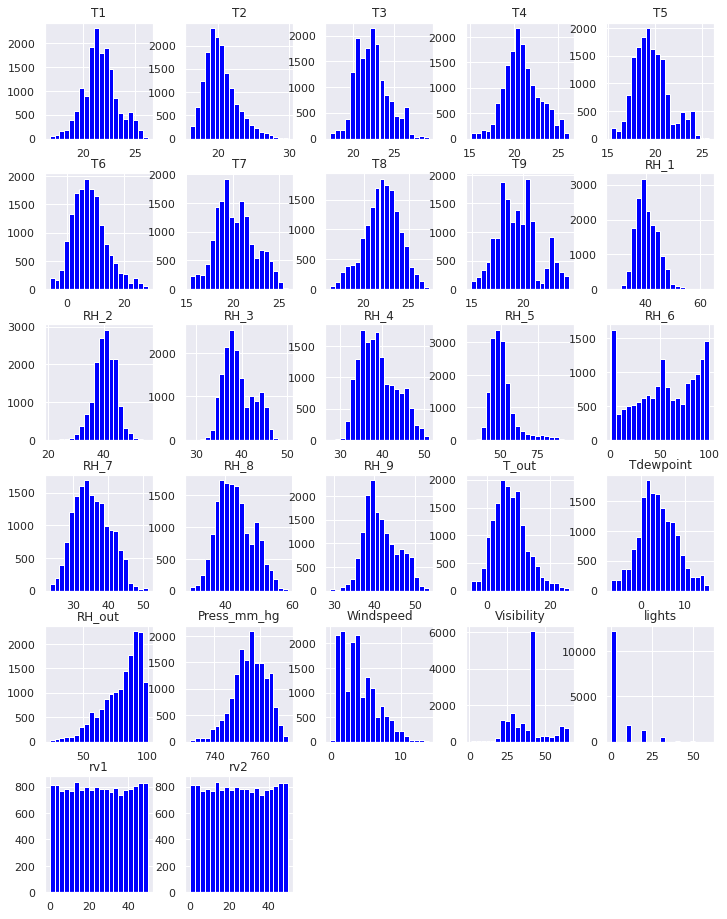

In [24]:
# Histogram of all the features to understand the distribution
feature_vars.hist(bins = 20 , figsize= (12,16),color='blue') ;

### RH_6 , RH_out , rv1 , rv2 , Visibility , Windspeed are in the focus due to irregular distribution

### Using Plotly helps us visualize data better as it allows us to interact with the plot like zoom in to the distribution and hover around to locate the values corresponding to axis value

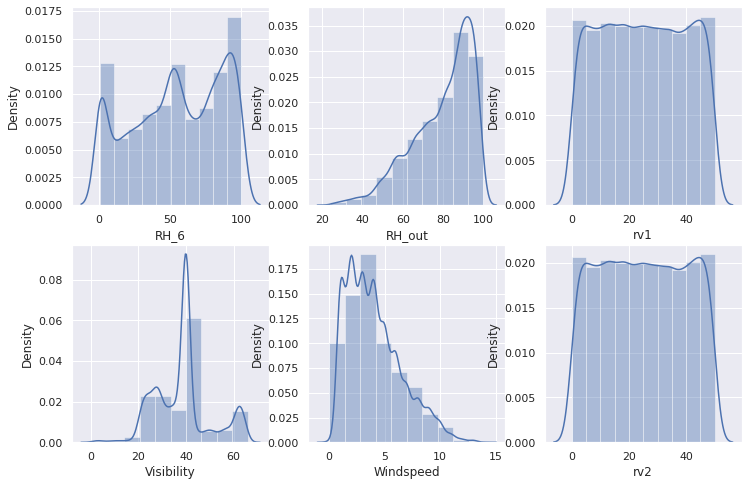

In [28]:
# focussed displots for RH_6 , RH_out , Visibility , Windspeed due to irregular distribution
f, ax = plt.subplots(2,3,figsize=(12,8))
vis1 = sns.distplot(feature_vars["RH_6"],bins=10, ax= ax[0][0])
vis2 = sns.distplot(feature_vars["RH_out"],bins=10, ax=ax[0][1])
vis3 = sns.distplot(feature_vars["Visibility"],bins=10, ax=ax[1][0])
vis4 = sns.distplot(feature_vars["Windspeed"],bins=10, ax=ax[1][1])
vis5 = sns.distplot(feature_vars["rv1"],bins=10, ax=ax[0][2])
vis6 = sns.distplot(feature_vars["rv2"],bins=10, ax=ax[1][2])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1edbf59510>]],
      dtype=object)

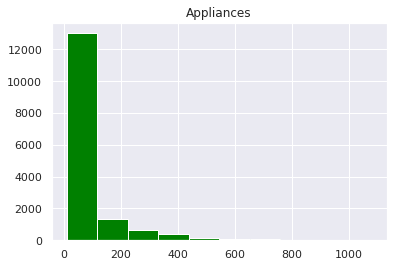

In [29]:
# Distribution of values in Applainces column
target_vars.hist(color='green',bins=10)